# Homework 6

TFCB 2022

Due date: Nov 17, 2022 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [72]:
library(tidyverse)
library(dplyr)
library(tibble)

## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


In [ ]:
# ! is an operator that will negate a following function, i.e. !TRUE = FALSE https://www.reddit.com/r/rstats/comments/a0uhzl/can_someone_explain_what_the_exclamation_mark/
# is.na is a check that can be applied to find values that are NA, will return as TRUE or FALSE https://statisticsglobe.com/r-is-na-function/
# is.numeric is a check that can be applied to determine whether values are numbers or not, will return TRUE or FALSE https://www.educative.io/answers/what-is-the-isnumeric-function-in-r#:~:text=In%20R%2C%20the%20is.,values%20are%20regarded%20as%20numeric.
# anti_join is a function that will look for rows in a table not contained by a second (screening) table http://zevross.com/blog/2014/08/05/using-the-r-function-anti_join-to-find-unmatched-records/
# desc will sort a list of values in descending order https://dplyr.tidyverse.org/reference/desc.html
# dplyr::slice is a function within dplyr that allows you to take a particular subset of values from a dataframe https://dplyr.tidyverse.org/reference/slice.html
# dplyr::across is a modifier that allows you to apply functions throughout a dataframe https://dplyr.tidyverse.org/reference/across.html 

## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [73]:
#the line below reads in the tab separated values from the specified file and creates a data frame 'annotations'. The pipe at the end allows us to chain together lines of code
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
  #the line of code below is parsing out the columns listed from the data file read in above, then a pipe to continue the expression
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  # Filter out null reads from the ccds_id column and pipe
  filter(!is.na(ccds_id)) %>%
  # print result
  print()

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 19229 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (39): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (3): entrez_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 18,785 × 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo… CCDS12…
 2 ENSG00000148584 A1CF    APOBEC1 complementation factor     RNA bindi… CCDS72…
 3 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m… CCDS44…
 4 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m… CCDS85…
 5 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt… CCDS60…
 6 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (… Alpha 1,4… CCDS14…
 7 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra… Alpha 1,4… CCDS30…
 8 ENSG00000094914 AAAS    aladin WD repeat nucleoporin       WD repeat… CCDS53…
 9 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA … CCDS92…
10 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A… CCDS33…
# … w

In [74]:
#read in the tab separated values from the denoted file and name it 'data'
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
  # change the name of the first column from 'ENSEMBL gene' to ensembl_gene_id
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  # print
  print()

Rows: 63677 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 × 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# … with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <db

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


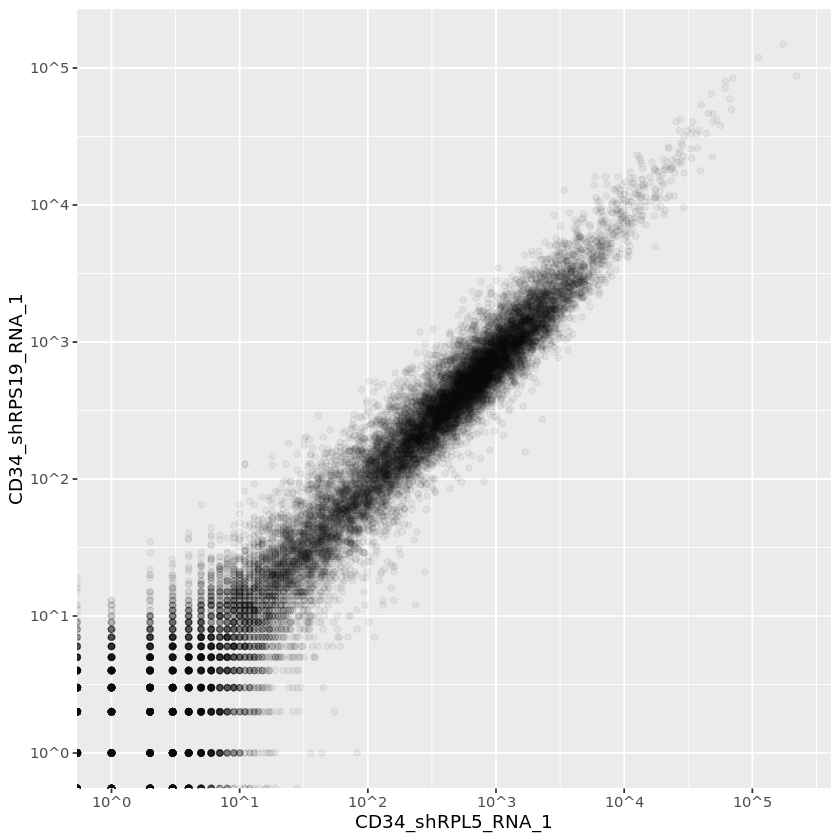

In [75]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>% #pick out the parameters by which we want to graph
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) + #input desired x and y assignments
  geom_point(alpha=0.05) + #designate graph type as point, and use alpha to show difference in density of points
  scale_x_log10(breaks=c(10^0,10^1,10^2,10^3,10^4,10^5),label=c("10^0","10^1","10^2","10^3","10^4","10^5")) + #set ticks per every log scale and name them accordingly
  scale_y_log10(breaks=c(10^0,10^1,10^2,10^3,10^4,10^5),label=c("10^0","10^1","10^2","10^3","10^4","10^5")) #set ticks per every log scale and name them accordingly

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [77]:
newdata <- data #I was too scared to be changing data every time so I made a new parameter named newdata
newdata <- newdata %>% #modify your parameter
    select(ensembl_gene_id, contains("RPL5"), contains("RPS19"), contains("Luc")) #pick out all columns that contain any of the desired terms, as well as the gene ID column
    print(newdata)


# A tibble: 63,677 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# … with 63,667 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <db

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [78]:
newdata <- newdata %>% #modify the newdata parameter
    filter(if_all(!contains("ensembl_gene_id"), ~. > 49)) #excluding the gene id column, filter out all columns that have fewer than 50 reads
    print(newdata)

# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [79]:
newdata <- newdata %>% #modify the newdata data frame
    mutate(across(!contains("ensembl_gene_id"), ~(./median(.)))) #apply the function "divide by column median" to every column excludign the gene ID column
    print(newdata)



# A tibble: 4,239 × 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419             0.817             0.832             0.620
 2 ENSG00000001036             1.09              0.779             1.12 
 3 ENSG00000001084             0.758             1.02              0.822
 4 ENSG00000001497             1.05              1.02              1.55 
 5 ENSG00000002549             0.899             0.987             1.75 
 6 ENSG00000002586             2.01              1.33              1.60 
 7 ENSG00000002834             3.18              3.16              1.56 
 8 ENSG00000003056             1.01              1.38              1.97 
 9 ENSG00000003393             0.609             0.574             0.515
10 ENSG00000003402             1.34              1.15              0.583
# … with 4,229 more rows, and 9 more variables: CD34_shRPL5_RPF_2 <dbl>,
#   CD34_shRPS19_RNA_1 <dbl>

## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [80]:
lfc <- newdata %>% #define a new variable lfc
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>% #create a new column of average shRPL5 RPF over RNA
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>% #create a new column of average shRPS19 RPF over RNA
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>% #create a new column of average shLuc RPF over RNA
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>% #select out the desired columns
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>% #create new, log2-scaled, columns of rpl5 and rps19 scaled against shluc
  print()

# A tibble: 4,239 × 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.919         1.49          1.08       -0.239
 2 ENSG00000001036        1.17          1.11          1.45       -0.316
 3 ENSG00000001084        1.02          1.14          0.853       0.258
 4 ENSG00000001497        1.38          1.04          1.75       -0.338
 5 ENSG00000002549        1.78          1.87          1.50        0.245
 6 ENSG00000002586        0.903         0.825         1.14       -0.331
 7 ENSG00000002834        0.479         0.394         0.519      -0.115
 8 ENSG00000003056        1.87          1.87          1.02        0.882
 9 ENSG00000003393        0.831         1.20          0.462       0.847
10 ENSG00000003402        0.505         0.427         0.344       0.552
# … with 4,229 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [81]:
mean_lfc <- lfc %>% #create a new data frame named mean_lfc
    mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19)/2) %>% #create anew column that is the average of the lfc_te_rpl5 and lfc_te_rps19
    select(ensembl_gene_id, avg_lfc) %>% #select out the gene ID and newly created avg_lfc columns
    print()

# A tibble: 4,239 × 2
   ensembl_gene_id avg_lfc
   <chr>             <dbl>
 1 ENSG00000000419   0.110
 2 ENSG00000001036  -0.355
 3 ENSG00000001084   0.337
 4 ENSG00000001497  -0.543
 5 ENSG00000002549   0.280
 6 ENSG00000002586  -0.396
 7 ENSG00000002834  -0.256
 8 ENSG00000003056   0.880
 9 ENSG00000003393   1.11 
10 ENSG00000003402   0.431
# … with 4,229 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [86]:
mean_lfc <- mean_lfc %>% #modify our new dataframe
    inner_join(annotations, by="ensembl_gene_id") #join together the annotations data frame with the mean_lfc dataframe
print(mean_lfc)

# A tibble: 4,205 × 10
   ensembl_gene_id avg_lfc symbol.x name.x       gene_group.x ccds_id.x symbol.y
   <chr>             <dbl> <chr>    <chr>        <chr>        <chr>     <chr>   
 1 ENSG00000000419   0.110 DPM1     dolichyl-ph… Glycosyltra… CCDS8262… DPM1    
 2 ENSG00000001036  -0.355 FUCA2    alpha-L-fuc… Alpha-L-fuc… CCDS5200  FUCA2   
 3 ENSG00000001084   0.337 GCLC     glutamate-c… NA           CCDS7547… GCLC    
 4 ENSG00000001497  -0.543 LAS1L    LAS1 like r… Large ribos… CCDS5543… LAS1L   
 5 ENSG00000002549   0.280 LAP3     leucine ami… Aminopeptid… CCDS3422  LAP3    
 6 ENSG00000002586  -0.396 CD99     CD99 molecu… Blood group… CCDS8345… CD99    
 7 ENSG00000002834  -0.256 LASP1    LIM and SH3… LIM domain … CCDS1133… LASP1   
 8 ENSG00000003056   0.880 M6PR     mannose-6-p… MRH domain … CCDS7344… M6PR    
 9 ENSG00000003393   1.11  ALS2     alsin Rho g… Dbl family … CCDS4649… ALS2    
10 ENSG00000003402   0.431 CFLAR    CASP8 and F… Receptor li… CCDS2337… CFLAR   
# … w

## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

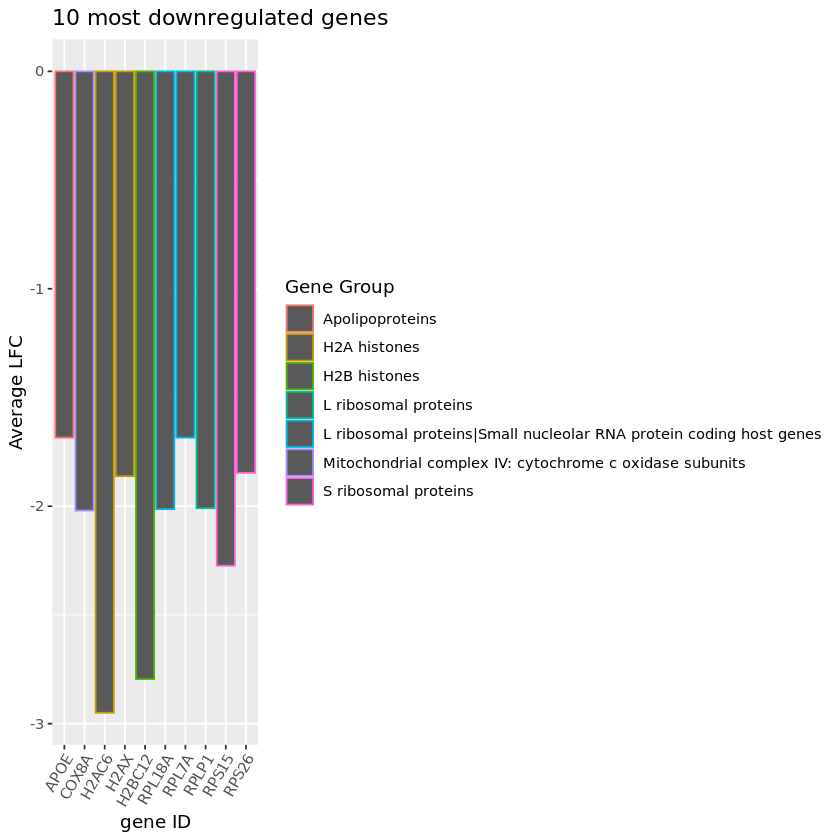

In [90]:
mean_lfc %>%
    arrange(avg_lfc) %>% #arrange data by ascending order
    slice(1:10) %>% #take lowest 10 values
    ggplot(aes(y=avg_lfc, x=symbol.x, color=gene_group.x)) + #define y as the avg_lfc, x as symbol, and add color coding
    geom_col() + #define it as a bar graph
    labs(title='10 most downregulated genes', x='gene ID', y='Average LFC',color="Gene Group") + #add title and axis labels
    theme(axis.text.x=element_text(angle=60,vjust=1,hjust=1)) #add a fun theme and play with placement of labels
    #